original code: https://m.blog.naver.com/windowsub0406/220894645729

In [66]:
print('OS: Windows')
import sys
print('python:', sys.version)

import numpy as np
print('numpy: ', np.__version__)

import cv2
print('opencv: ', cv2.__version__)

import matplotlib as mpl
print('matplotlib: ', mpl.__version__)

OS: Windows
python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
numpy:  1.19.2
opencv:  4.0.1
matplotlib:  3.3.4


# 01 차선인식(RGB&ROI)

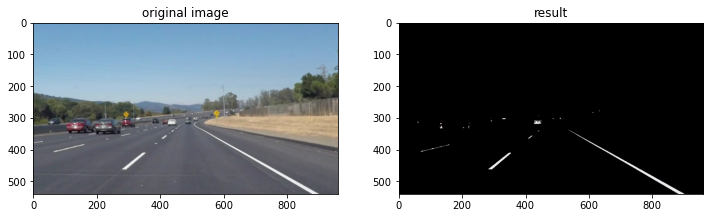

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


#road image for lane recognition
image = cv2.imread('solidWhiteCurve.jpg')

#visulize

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


mark = np.copy(image)


# set BGR upper limit
blue_threshold = 200
green_threshold = 200
red_threshold = 200

# change pixels to black if value is smaller than threshold 
bgr_threshold = [blue_threshold, green_threshold, red_threshold]

thresholds = (image[:, :, 0] < bgr_threshold[0]) | \
             (image[:, :, 1] < bgr_threshold[1]) | \
             (image[:, :, 2] < bgr_threshold[2]) 

mark[thresholds] = [0,0,0]


plt.subplot(1, 2, 2)
plt.title('result')
plt.imshow(cv2.cvtColor(mark, cv2.COLOR_BGR2RGB))

plt.show()


ROI를 이용한 검출

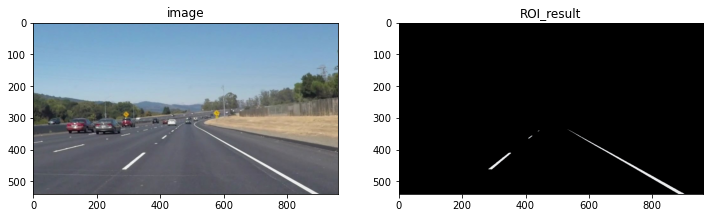

In [47]:
def region_of_interest(img, vertices, color3=(255,255,255), color1=255): # ROI 셋팅

    mask = np.zeros_like(img) # mask = img와 같은 크기의 빈 이미지
    
    if len(img.shape) > 2: # Color 이미지(3채널)라면 :
        color = color3
    else: # 흑백 이미지(1채널)라면 :
        color = color1
        
    # vertices에 정한 점들로 이뤄진 다각형부분(ROI 설정부분)을 color로 채움 
    cv2.fillPoly(mask, vertices, color)
    
    # 이미지와 color로 채워진 ROI를 합침
    ROI_image = cv2.bitwise_and(img, mask)
    return ROI_image

def mark_img(img, blue_threshold=200, green_threshold=200, red_threshold=200): # 흰색 차선 찾기

    #  BGR 제한 값
    bgr_threshold = [blue_threshold, green_threshold, red_threshold]

    # BGR 제한 값보다 작으면 검은색으로
    thresholds = (image[:,:,0] < bgr_threshold[0]) \
                | (image[:,:,1] < bgr_threshold[1]) \
                | (image[:,:,2] < bgr_threshold[2])
    mark[thresholds] = [0,0,0]
    return mark

image = cv2.imread('solidWhiteCurve.jpg') # 이미지 읽기
height, width = image.shape[:2] # 이미지 높이, 너비

# 사다리꼴 모형의 Points
vertices = np.array([[(50,height),(width/2-45, height/2+60), 
                      (width/2+45, height/2+60), (width-50,height)]], dtype=np.int32)
roi_img = region_of_interest(image, vertices) # vertices에 정한 점들 기준으로 ROI 이미지 생성

mark = np.copy(roi_img) # roi_img 복사
mark = mark_img(roi_img) # 흰색 차선 찾기


# cv2.imshow('roi_white',mark) # 흰색 차선 추출 결과 출력
# cv2.imshow('result',image) # 이미지 출력
# cv2.waitKey(0) 

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title('image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('ROI_result')
plt.imshow(cv2.cvtColor(mark, cv2.COLOR_BGR2RGB))

plt.show()

동영상에 적용

In [33]:
import cv2 # opencv 사용
import numpy as np

def region_of_interest(img, vertices, color3=(255,255,255), color1=255): # ROI 셋팅

    mask = np.zeros_like(img) # mask = img와 같은 크기의 빈 이미지
    
    if len(img.shape) > 2: # Color 이미지(3채널)라면 :
        color = color3
    else: # 흑백 이미지(1채널)라면 :
        color = color1
        
    # vertices에 정한 점들로 이뤄진 다각형부분(ROI 설정부분)을 color로 채움 
    cv2.fillPoly(mask, vertices, color)
    
    # 이미지와 color로 채워진 ROI를 합침
    ROI_image = cv2.bitwise_and(img, mask)
    return ROI_image

def mark_img(img, blue_threshold=200, green_threshold=200, red_threshold=200): # 흰색 차선 찾기

    #  BGR 제한 값
    bgr_threshold = [blue_threshold, green_threshold, red_threshold]

    # BGR 제한 값보다 작으면 검은색으로
    thresholds = (image[:,:,0] < bgr_threshold[0]) \
                | (image[:,:,1] < bgr_threshold[1]) \
                | (image[:,:,2] < bgr_threshold[2])
    mark[thresholds] = [0,0,0]
    return mark

cap = cv2.VideoCapture('solidWhiteRight.mp4') # 동영상 불러오기

while(cap.isOpened()):
    ret, image = cap.read()
    height, width = image.shape[:2] # 이미지 높이, 너비

    # 사다리꼴 모형의 Points
    vertices = np.array([[(50,height),(width/2-45, height/2+60), (width/2+45, height/2+60), (width-50,height)]], dtype=np.int32)
    roi_img = region_of_interest(image, vertices, (0,0,255)) # vertices에 정한 점들 기준으로 ROI 이미지 생성

    mark = np.copy(roi_img) # roi_img 복사
    mark = mark_img(roi_img) # 흰색 차선 찾기

    # 흰색 차선 검출한 부분을 원본 image에 overlap 하기
    color_thresholds = (mark[:,:,0] == 0) & (mark[:,:,1] == 0) & (mark[:,:,2] > 200)
    image[color_thresholds] = [0,0,255]

    cv2.imshow('results',image) # 이미지 출력
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# Release
cap.release()
cv2.destroyAllWindows()

# 02 차선인식(Edge)

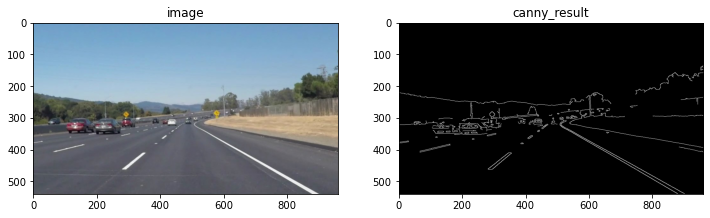

In [49]:
import cv2 # opencv 사용
import numpy as np

def grayscale(img): # 흑백이미지로 변환
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def canny(img, low_threshold, high_threshold): # Canny 알고리즘
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size): # 가우시안 필터
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

image = cv2.imread('solidWhiteCurve.jpg') # 이미지 읽기
height, width = image.shape[:2] # 이미지 높이, 너비

gray_img = grayscale(image) # 흑백이미지로 변환
    
blur_img = gaussian_blur(gray_img, 3) # Blur 효과
        
canny_img = canny(blur_img, 70, 210) # Canny edge 알고리즘



# cv2.imshow('result',canny_img) # Canny 이미지 출력
# cv2.waitKey(0) 

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title('image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('canny_result')
plt.imshow(cv2.cvtColor(canny_img, cv2.COLOR_BGR2RGB))

plt.show()

# 03 차선인식(hough transform)

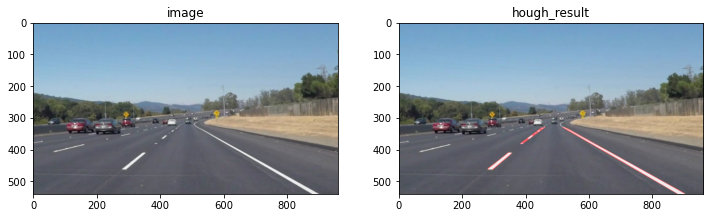

In [54]:
import cv2 # opencv 사용
import numpy as np

def grayscale(img): # 흑백이미지로 변환
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def canny(img, low_threshold, high_threshold): # Canny 알고리즘
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size): # 가우시안 필터
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices, color3=(255,255,255), color1=255): # ROI 셋팅

    mask = np.zeros_like(img) # mask = img와 같은 크기의 빈 이미지
    
    if len(img.shape) > 2: # Color 이미지(3채널)라면 :
        color = color3
    else: # 흑백 이미지(1채널)라면 :
        color = color1
        
    # vertices에 정한 점들로 이뤄진 다각형부분(ROI 설정부분)을 color로 채움 
    cv2.fillPoly(mask, vertices, color)
    
    # 이미지와 color로 채워진 ROI를 합침
    ROI_image = cv2.bitwise_and(img, mask)
    return ROI_image

def draw_lines(img, lines, color=[0, 0, 255], thickness=2): # 선 그리기
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap): # 허프 변환
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)

    return line_img

def weighted_img(img, initial_img, α=1, β=1., λ=0.): # 두 이미지 operlap 하기
    return cv2.addWeighted(initial_img, α, img, β, λ)

image = cv2.imread('solidWhiteCurve.jpg') # 이미지 읽기
height, width = image.shape[:2] # 이미지 높이, 너비

gray_img = grayscale(image) # 흑백이미지로 변환
    
blur_img = gaussian_blur(gray_img, 3) # Blur 효과
        
canny_img = canny(blur_img, 70, 210) # Canny edge 알고리즘

vertices = np.array([[(50,height),(width/2-45, height/2+60), (width/2+45, height/2+60), (width-50,height)]], dtype=np.int32)
ROI_img = region_of_interest(canny_img, vertices) # ROI 설정

hough_img = hough_lines(ROI_img, 1, 1 * np.pi/180, 30, 10, 20) # 허프 변환

result = weighted_img(hough_img, image) # 원본 이미지에 검출된 선 overlap


# cv2.imshow('result',result) # 결과 이미지 출력
# cv2.waitKey(0) 


plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title('image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('hough_result')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

plt.show()

동영상에서 적용

In [37]:
import cv2 # opencv 사용
import numpy as np

def grayscale(img): # 흑백이미지로 변환
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def canny(img, low_threshold, high_threshold): # Canny 알고리즘
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size): # 가우시안 필터
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices, color3=(255,255,255), color1=255): # ROI 셋팅

    mask = np.zeros_like(img) # mask = img와 같은 크기의 빈 이미지
    
    if len(img.shape) > 2: # Color 이미지(3채널)라면 :
        color = color3
    else: # 흑백 이미지(1채널)라면 :
        color = color1
        
    # vertices에 정한 점들로 이뤄진 다각형부분(ROI 설정부분)을 color로 채움 
    cv2.fillPoly(mask, vertices, color)
    
    # 이미지와 color로 채워진 ROI를 합침
    ROI_image = cv2.bitwise_and(img, mask)
    return ROI_image

def draw_lines(img, lines, color=[0, 0, 255], thickness=2): # 선 그리기
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap): # 허프 변환
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)

    return line_img

def weighted_img(img, initial_img, α=1, β=1., λ=0.): # 두 이미지 operlap 하기
    return cv2.addWeighted(initial_img, α, img, β, λ)

cap = cv2.VideoCapture('solidWhiteRight.mp4') # 동영상 불러오기

while(cap.isOpened()):
    ret, image = cap.read()

    height, width = image.shape[:2] # 이미지 높이, 너비

    gray_img = grayscale(image) # 흑백이미지로 변환
    
    blur_img = gaussian_blur(gray_img, 3) # Blur 효과
        
    canny_img = canny(blur_img, 70, 210) # Canny edge 알고리즘

    vertices = np.array([[(50,height),(width/2-45, height/2+60), (width/2+45, height/2+60), (width-50,height)]], dtype=np.int32)
    ROI_img = region_of_interest(canny_img, vertices) # ROI 설정

    hough_img = hough_lines(ROI_img, 1, 1 * np.pi/180, 30, 10, 20) # 허프 변환

    result = weighted_img(hough_img, image) # 원본 이미지에 검출된 선 overlap
    cv2.imshow('result',result) # 결과 이미지 출력
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# Release
cap.release()
cv2.destroyAllWindows()

# 04 차선인식( 기울기 응용)

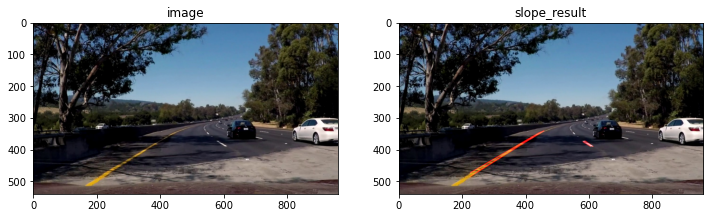

In [55]:
import cv2 # opencv 사용
import numpy as np

def grayscale(img): # 흑백이미지로 변환
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def canny(img, low_threshold, high_threshold): # Canny 알고리즘
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size): # 가우시안 필터
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices, color3=(255,255,255), color1=255): # ROI 셋팅

    mask = np.zeros_like(img) # mask = img와 같은 크기의 빈 이미지
    
    if len(img.shape) > 2: # Color 이미지(3채널)라면 :
        color = color3
    else: # 흑백 이미지(1채널)라면 :
        color = color1
        
    # vertices에 정한 점들로 이뤄진 다각형부분(ROI 설정부분)을 color로 채움 
    cv2.fillPoly(mask, vertices, color)
    
    # 이미지와 color로 채워진 ROI를 합침
    ROI_image = cv2.bitwise_and(img, mask)
    return ROI_image

def draw_lines(img, lines, color=[0, 0, 255], thickness=2): # 선 그리기
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap): # 허프 변환
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    #line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    #draw_lines(line_img, lines)

    return lines

def weighted_img(img, initial_img, α=1, β=1., λ=0.): # 두 이미지 operlap 하기
    return cv2.addWeighted(initial_img, α, img, β, λ)

image = cv2.imread('slope_test.jpg') # 이미지 읽기
height, width = image.shape[:2] # 이미지 높이, 너비

gray_img = grayscale(image) # 흑백이미지로 변환
    
blur_img = gaussian_blur(gray_img, 3) # Blur 효과
        
canny_img = canny(blur_img, 70, 210) # Canny edge 알고리즘

vertices = np.array([[(50,height),(width/2-45, height/2+60), (width/2+45, height/2+60), (width-50,height)]], dtype=np.int32)
ROI_img = region_of_interest(canny_img, vertices) # ROI 설정

line_arr = hough_lines(ROI_img, 1, 1 * np.pi/180, 30, 10, 20) # 허프 변환
line_arr = np.squeeze(line_arr)
    
# 기울기 구하기
slope_degree = (np.arctan2(line_arr[:,1] - line_arr[:,3], 
                           line_arr[:,0] - line_arr[:,2]) * 180) / np.pi

# 수평 기울기 제한
line_arr = line_arr[np.abs(slope_degree)<160]
slope_degree = slope_degree[np.abs(slope_degree)<160]
# 수직 기울기 제한
line_arr = line_arr[np.abs(slope_degree)>95]
slope_degree = slope_degree[np.abs(slope_degree)>95]
# 필터링된 직선 버리기
L_lines, R_lines = line_arr[(slope_degree>0),:], line_arr[(slope_degree<0),:]
temp = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
L_lines, R_lines = L_lines[:,None], R_lines[:,None]
# 직선 그리기
draw_lines(temp, L_lines)
draw_lines(temp, R_lines)

result = weighted_img(temp, image) # 원본 이미지에 검출된 선 overlap


# cv2.imshow('result',result) # 결과 이미지 출력
# cv2.waitKey(0)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title('image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('slope_result')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

plt.show()

대표선 구하기

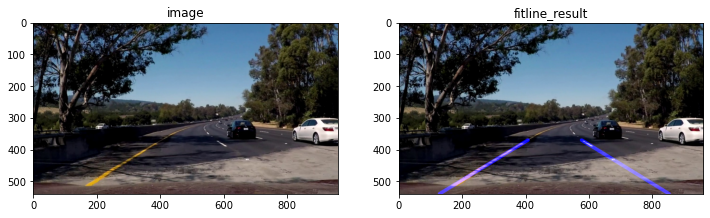

In [56]:
import cv2 # opencv 사용
import numpy as np

def grayscale(img): # 흑백이미지로 변환
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

def canny(img, low_threshold, high_threshold): # Canny 알고리즘
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size): # 가우시안 필터
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices, color3=(255,255,255), color1=255): # ROI 셋팅

    mask = np.zeros_like(img) # mask = img와 같은 크기의 빈 이미지
    
    if len(img.shape) > 2: # Color 이미지(3채널)라면 :
        color = color3
    else: # 흑백 이미지(1채널)라면 :
        color = color1
        
    # vertices에 정한 점들로 이뤄진 다각형부분(ROI 설정부분)을 color로 채움 
    cv2.fillPoly(mask, vertices, color)
    
    # 이미지와 color로 채워진 ROI를 합침
    ROI_image = cv2.bitwise_and(img, mask)
    return ROI_image

def draw_lines(img, lines, color=[255, 0, 0], thickness=2): # 선 그리기
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def draw_fit_line(img, lines, color=[255, 0, 0], thickness=10): # 대표선 그리기
        cv2.line(img, (lines[0], lines[1]), (lines[2], lines[3]), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap): # 허프 변환
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    #line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    #draw_lines(line_img, lines)

    return lines

def weighted_img(img, initial_img, α=1, β=1., λ=0.): # 두 이미지 operlap 하기
    return cv2.addWeighted(initial_img, α, img, β, λ)

def get_fitline(img, f_lines): # 대표선 구하기   
    lines = np.squeeze(f_lines)
    lines = lines.reshape(lines.shape[0]*2,2)
    rows,cols = img.shape[:2]
    output = cv2.fitLine(lines,cv2.DIST_L2,0, 0.01, 0.01)
    vx, vy, x, y = output[0], output[1], output[2], output[3]
    x1, y1 = int(((img.shape[0]-1)-y)/vy*vx + x) , img.shape[0]-1
    x2, y2 = int(((img.shape[0]/2+100)-y)/vy*vx + x) , int(img.shape[0]/2+100)
    
    result = [x1,y1,x2,y2]
    return result

image = cv2.imread('slope_test.jpg') # 이미지 읽기

height, width = image.shape[:2] # 이미지 높이, 너비

gray_img = grayscale(image) # 흑백이미지로 변환
    
blur_img = gaussian_blur(gray_img, 3) # Blur 효과
   
canny_img = canny(blur_img, 70, 210) # Canny edge 알고리즘

vertices = np.array([[(50,height),(width/2-45, height/2+60), (width/2+45, height/2+60), (width-50,height)]], dtype=np.int32)
ROI_img = region_of_interest(canny_img, vertices) # ROI 설정

line_arr = hough_lines(ROI_img, 1, 1 * np.pi/180, 30, 10, 20) # 허프 변환
line_arr = np.squeeze(line_arr)
    
# 기울기 구하기
slope_degree = (np.arctan2(line_arr[:,1] - line_arr[:,3], line_arr[:,0] - line_arr[:,2]) * 180) / np.pi

# 수평 기울기 제한
line_arr = line_arr[np.abs(slope_degree)<160]
slope_degree = slope_degree[np.abs(slope_degree)<160]
# 수직 기울기 제한
line_arr = line_arr[np.abs(slope_degree)>95]
slope_degree = slope_degree[np.abs(slope_degree)>95]
# 필터링된 직선 버리기
L_lines, R_lines = line_arr[(slope_degree>0),:], line_arr[(slope_degree<0),:]
temp = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
L_lines, R_lines = L_lines[:,None], R_lines[:,None]
# 왼쪽, 오른쪽 각각 대표선 구하기
left_fit_line = get_fitline(image,L_lines)
right_fit_line = get_fitline(image,R_lines)
# 대표선 그리기
draw_fit_line(temp, left_fit_line)
draw_fit_line(temp, right_fit_line)

result = weighted_img(temp, image) # 원본 이미지에 검출된 선 overlap

# cv2.imshow('result',result) # 결과 이미지 출력
# cv2.waitKey(0)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title('image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('fitline_result')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

plt.show()